# Table of contents:
1. Gathering Data
2. Accessing Data
3. Cleaning Data
4. Data Analysis and Data Visualization

# Section_1: Gathering Data
Gather all three pieces of Data as described below:

- Download 'twitter-archive-enhanced.csv' manually

- Download 'image_predictions.tsv' programmatically using Requests python library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

- Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission. 






In [581]:
#Importing relevant packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import io
import re

In [582]:
#Reading twitter-archive-enhanced.csv file i panda dataframe
df_arch = pd.read_csv('twitter-archive-enhanced.csv')
df_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [583]:
#Load image_predictions.tsv file from provided url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url).content
image_predictions = pd.read_csv(io.StringIO(r.decode('utf-8')), delimiter = '\t')         
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [584]:
#Twitter API code o gather some of the required data for the project
'''
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

'\nimport tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df_1.

In [585]:
#Load tweets_json.txt into pandas dataframe
with open('tweet_json.txt') as file:
    df_tweets = pd.read_json(file, lines=True, encoding= 'utf-8')

df_tweets.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [586]:
#Only keep useful columns.
df_tweets = df_tweets[['id', 'display_text_range', 'favorite_count', 'retweet_count']]
df_tweets.head()

,id,display_text_range,favorite_count,retweet_count
0,892420643555336193,"[0, 85]",39467,8853
1,892177421306343426,"[0, 138]",33819,6514
2,891815181378084864,"[0, 121]",25461,4328
3,891689557279858688,"[0, 79]",42908,8964
4,891327558926688256,"[0, 138]",41048,9774


In [587]:
df_tweets.tail()

,id,display_text_range,favorite_count,retweet_count
2349,666049248165822465,"[0, 120]",111,41
2350,666044226329800704,"[0, 137]",311,147
2351,666033412701032449,"[0, 130]",128,47
2352,666029285002620928,"[0, 139]",132,48
2353,666020888022790149,"[0, 131]",2535,532


# Section_2: Assessing Data 


- Data 1: WeRateDogs Twitter Archive (twitter-archive-enhanced.csv)

In [588]:
df_arch.sample(60)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
96,873580283840344065,NaN,NaN,2017-06-10 16:39:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We usually don't rate Deck-bound Saskatoon Bla...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/873580283...,13,10,None,None,None,None,None
464,817415592588222464,NaN,NaN,2017-01-06 17:00:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Strudel. He's rather h*ckin pupset that y...,NaN,NaN,NaN,https://www.gofundme.com/help-strudel-walk-aga...,11,10,Strudel,None,None,None,None
1872,675146535592706048,NaN,NaN,2015-12-11 02:54:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coops. He's yelling at the carpet. Not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675146535...,7,10,Coops,None,None,None,None
361,829501995190984704,NaN,NaN,2017-02-09 01:27:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He was a skater pup. She said see...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829501995...,12,10,Leo,None,None,None,None
2337,666268910803644416,NaN,NaN,2015-11-16 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very concerned about fellow dog trapped in com...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666268910...,10,10,None,None,None,None,None
493,813202720496779264,NaN,NaN,2016-12-26 02:00:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo who has concluded that Christma...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813202720...,11,10,None,doggo,None,None,None
886,759943073749200896,NaN,NaN,2016-08-01 02:45:22 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a wicked fast pupper. 12/10 camera coul...,NaN,NaN,NaN,https://vine.co/v/5AJm5pq7Kav,12,10,None,None,None,pupper,None
174,858107933456039936,NaN,NaN,2017-04-28 23:57:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wyatt. He had an interview earlier tod...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858107933...,12,10,Wyatt,None,None,None,None
1892,674754018082705410,6.747522e+17,4.196984e+09,2015-12-10 00:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Just received another perfect photo of dogs an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674754018...,12,10,None,None,None,None,None
2300,667062181243039745,NaN,NaN,2015-11-18 19:29:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Keet. He is a Floridian Amukamara. Abs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667062181...,10,10,Keet,None,None,None,None


In [589]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [590]:
df_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [591]:
df_arch['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [592]:
name_list=(df_arch['name'].tolist())
name_list

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 'None',
 'None',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'None',
 'Waffles',
 'None',
 'Jimbo',
 'Maisey',
 'None',
 'Lilly',
 'None',
 'Earl',
 'Lola',
 'Kevin',
 'None',
 'None',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'None',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'None',
 'a',
 'Elliot',
 'Louis',
 'None',
 'Bella',
 'Jesse',
 'None',
 'Romeo',
 'None',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'None',
 'Shadow',
 'Terrance',
 'Shadow',
 'Emmy',
 'Aja',
 'None',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'None',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'None',
 'None',
 'Cash',
 'Coco',
 'Jed',
 'None',
 'Sebastian',
 'Walter',
 'None',
 'Sierra',
 'Sierra',
 'None',
 'None',
 

visually assesing the list of names above we can see that the "None", "a", and "my" etc can not be the correct name

In [593]:
# check what stopwords are there in the name list.
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.append('None')
word_tokens = [word for word in name_list if word in stop_words]
sorted(word_tokens)

['None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 

The name column contains wrong names like ‘None’, ‘a’, ‘all’, ‘an’, ‘by’, ‘his’, ‘just’, ‘my’, ‘not’, ‘such’, ‘the’, ‘this’, and ‘very’. These names should be removed or replace with other things in further analysis.

In [594]:
#finding duplicates
df_arch.duplicated().sum()

0

In [595]:
#finding missing values
df_arch.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

It appears that 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id'
'retweeted_status_timestamp', 'expanded_urls' have missing values present                  

In [596]:
df_arch.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object


(a) The datatype of the tweet_id column should be String 
(b) The datatype of the timestamp column should be Datetime

In [597]:
df_arch.timestamp.head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

- Data 2: Tweet image predictions (image_predictions.tsv)

In [598]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


no missing values present

In [599]:
image_predictions.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
244,670465786746662913,https://pbs.twimg.com/media/CU35E7VWEAAKYBy.jpg,1,axolotl,0.611558,False,tailed_frog,0.186484,False,common_newt,0.078694,False
606,679877062409191424,https://pbs.twimg.com/media/CW9olDsUsAA0XSf.jpg,1,hog,0.809466,False,hay,0.060178,False,lumbermill,0.016483,False
744,687480748861947905,https://pbs.twimg.com/media/CYpsFmIWAAAYh9C.jpg,1,English_springer,0.472273,True,English_setter,0.166862,True,Brittany_spaniel,0.163411,True
1928,858107933456039936,https://pbs.twimg.com/media/C-icm_WXUAAmuRR.jpg,1,golden_retriever,0.863874,True,Labrador_retriever,0.015920,True,doormat,0.010615,False
1374,762699858130116608,https://pbs.twimg.com/media/CpWnecZWIAAUFwt.jpg,1,kelpie,0.519047,True,German_shepherd,0.296069,True,dingo,0.061005,False
1501,784431430411685888,https://pbs.twimg.com/media/CuLcNkCXgAEIwK2.jpg,1,miniature_poodle,0.744819,True,toy_poodle,0.243192,True,standard_poodle,0.010920,True
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
409,673715861853720576,https://pbs.twimg.com/media/CVmE_fAWIAAlDhU.jpg,1,suit,0.404115,False,bow_tie,0.294683,False,Windsor_tie,0.132701,False
801,691444869282295808,https://pbs.twimg.com/media/CZiBcJhWQAATXNK.jpg,2,Bernese_mountain_dog,0.767563,True,Border_collie,0.085805,True,EntleBucher,0.043769,True
350,672488522314567680,https://pbs.twimg.com/media/CVUovvHWwAAD-nu.jpg,1,Doberman,0.605358,True,Rottweiler,0.108382,True,Appenzeller,0.077798,True


From the samples above we can tell that:

1. There are rows without any predictions of the dog
2. There are both uppercase and lowercase characters in the p1, p2, p3 columns. 
3. Also, the prediction result in these three columns also shows that there are lots of other species’ pictures, not just dog pictures.

In [600]:
#checking datatype of columns
image_predictions.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

it appears the tweet_id column is an integer instead of a string

In [601]:
image_predictions.duplicated().sum()

0

In [602]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


- Data 3: json_tweets file 

In [603]:
df_tweets.sample(20)

,id,display_text_range,favorite_count,retweet_count
1085,738156290900254721,"[0, 54]",2768,748
1155,724405726123311104,"[0, 98]",5800,1847
1999,672482722825261057,"[0, 106]",1221,665
103,872261713294495745,"[0, 138]",35085,6649
1701,680913438424612864,"[0, 100]",2609,705
653,791821351946420224,"[0, 114]",0,24514
156,861288531465048066,"[0, 138]",18032,4479
2270,667491009379606528,"[0, 138]",559,242
1974,672995267319328768,"[0, 120]",1001,328
1587,686683045143953408,"[0, 120]",3072,912


In [604]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  2354 non-null   int64 
 1   display_text_range  2354 non-null   object
 2   favorite_count      2354 non-null   int64 
 3   retweet_count       2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [605]:
df_tweets.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [606]:
df_tweets.dtypes

id                     int64
display_text_range    object
favorite_count         int64
retweet_count          int64
dtype: object

### Data Quality Issues
#### df_arch
 - Classify all dog stages into one column and drop individual columns ['doggo','pupper', 'floofer', 'puppo' ]
 - Some of the dog names are not correct (None, an, by, a, …)
 - In timestamp column +0000 is redundent information
 - The datatype of the timestamp should be DateTime not Object 
 - Column source content  is too long for such source information, shorten it and replace with a more descriptive.
 - The columns “in_reply_to_status_id”, “in_reply_to_user_id”, “retweeted_status_id”, “retweeted_status_user_id”, and “retweeted_status_timestamp” have lots of NA values.
 - Drop Rows with retweets
 - The datatype of tweet_id should be String, not Integer
 - Remove the string starting 'https' in text column
 

#### image_predictions
- The prediction p1,p2,p3 is an uppercase and lowercase mix, also there are “_” in the breed name, also change variable names to a more descriptive name
- The datatype of tweet_id should be string, not Integer


#### df_tweets
- The datatype of tweet_id should be string, not Integer

### Data Tidiness Issues
- Create dog classifier column and drop individual dog stage columns.
- merge tables
- numerator_rating and denominator should be merged in one rating column instead of two column.
- extract date, time. year, month and weekday from timestamp

# Section_3: Cleaning Data

In [607]:
 #Making a copy of each dataset
df_arch_clean = df_arch.copy()
image_predictions_clean = image_predictions.copy()
df_tweets_clean = df_tweets.copy()

#### Define 
handle none values  |
classify them into one new column by merging |
handle multiple stages  |
drop individual dog stage column  |
replace empty rows with Nan.

#### Code

In [608]:
# handle none values
df_arch_clean.doggo.replace('None', '', inplace=True)
df_arch_clean.floofer.replace('None', '', inplace=True)
df_arch_clean.pupper.replace('None', '', inplace=True)
df_arch_clean.puppo.replace('None', '', inplace=True)


# merge into column
df_arch_clean['dog_stage'] = df_arch_clean.doggo + df_arch_clean.floofer + df_arch_clean.pupper + df_arch_clean.puppo


# handle multiple stages
df_arch_clean.loc[df_arch_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_arch_clean.loc[df_arch_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_arch_clean.loc[df_arch_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'


# handle missing values
df_arch_clean.loc[df_arch_clean.dog_stage == '', 'dog_stage'] = np.nan

In [609]:
df_arch_clean.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
1388,700462010979500032,NaN,NaN,2016-02-18 23:28:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Murphy. He's a mini golden retriever. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700462010...,6,10,Murphy,,,,,NaN
1523,690607260360429569,6.903413e+17,467036706.0,2016-01-22 18:49:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 @LightningHoltt,NaN,NaN,NaN,NaN,12,10,None,,,,,NaN
533,807621403335917568,NaN,NaN,2016-12-10 16:22:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ollie Vue. He was a 3 legged pupper on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/807621403...,14,10,Ollie,,,pupper,,pupper
2108,670452855871037440,NaN,NaN,2015-11-28 04:03:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog can't see its haters. 11/10 https://t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670452855...,11,10,None,,,,,NaN
713,784183165795655680,NaN,NaN,2016-10-07 00:06:50 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Reginald. He's one magical puppo. Aero...,NaN,NaN,NaN,https://vine.co/v/5ghHLBMMdlV,12,10,Reginald,,,,puppo,puppo
832,768596291618299904,NaN,NaN,2016-08-24 23:50:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Oakley and Charlie. They're convi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768596291...,12,10,Oakley,,,,,NaN
1804,676946864479084545,NaN,NaN,2015-12-16 02:08:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pups goal was to get all four feet as clo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676946864...,12,10,None,,,,,NaN
51,882268110199369728,NaN,NaN,2017-07-04 16:01:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfy. You're witnessing his first wate...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882268110...,13,10,Alfy,,,,,NaN
769,777189768882946048,NaN,NaN,2016-09-17 16:57:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrey. He's being held so he doesn't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/777189768...,12,10,Jeffrey,,,,,NaN
1334,705428427625635840,NaN,NaN,2016-03-03 16:23:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ambrose. He's an Alfalfa Ballyhoo. Dra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705428427...,11,10,Ambrose,,,pupper,,pupper


In [610]:
# drop the four old colomns
df_arch_clean = df_arch_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

#### Test

In [611]:
df_arch_clean.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2269,667509364010450944,NaN,NaN,2015-11-20 01:06:48 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This a Norwegian Pewterschmidt named Tickles. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667509364...,12,10,None,NaN
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Pipsy. He is a fluffbal...,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,NaN
1212,715342466308784130,NaN,NaN,2016-03-31 00:58:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar. He's a world renowned snowball ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715342466...,10,10,Oscar,NaN
747,779834332596887552,NaN,NaN,2016-09-25 00:06:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He really wants to kiss himself...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/779834332...,11,10,Scout,NaN
2160,669567591774625800,NaN,NaN,2015-11-25 17:25:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Kollin. He's a Parakeetian Badminton from...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669567591...,9,10,Kollin,NaN
116,870308999962521604,NaN,NaN,2017-06-01 16:00:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Rumble, but he's not ready to. Would r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/870308999...,13,10,Rumble,NaN
1482,693267061318012928,NaN,NaN,2016-01-30 02:58:42 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Oscar. He can wave. Friendly af. 12/10...,NaN,NaN,NaN,https://vine.co/v/i5n2irFUYWv,12,10,Oscar,NaN
526,808838249661788160,NaN,NaN,2016-12-14 00:57:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ito. He'll be your uber driver tonight...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808838249...,13,10,Ito,NaN
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,NaN
1286,708400866336894977,NaN,NaN,2016-03-11 21:15:02 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",RT if you are as ready for summer as this pup ...,NaN,NaN,NaN,https://vine.co/v/iHFqnjKVbIQ,12,10,None,NaN


#### Define: 
Replace stopwords in dog name column like ‘None’, ‘a’, ‘all’, ‘an’, ‘by’, ‘his’, ‘just’, ‘my’, ‘not’, ‘such’, ‘the’, ‘this’, and ‘very’ to NaN 

#### Code

In [612]:
for i in word_tokens:
    df_arch_clean['name'].replace(i, np.nan, inplace=True)

#### Test

In [613]:
df_arch_clean.name.sample(20)

840        Rupert
568           NaN
1911        Lenny
2201          NaN
1024       Shiloh
1251         Milo
1909          Ava
1474          NaN
1568          NaN
499           NaN
1054         Bell
1317          NaN
2272          NaN
2176       Samsom
1952    Shnuggles
2261          NaN
115          Zoey
175         Rosie
1204          NaN
830         Jesse
Name: name, dtype: object

In [614]:
df_arch_clean['name'].value_counts()

Charlie       12
Lucy          11
Cooper        11
Oliver        11
Tucker        10
              ..
Gert           1
Dex            1
Ace            1
Tayzie         1
Christoper     1
Name: name, Length: 944, dtype: int64

#### Define
use strip to Remove '+0000' from timestamp

#### Code


In [615]:
df_arch_clean.timestamp =  df_arch_clean.timestamp.str[:-5].str.strip()

#### Test

In [616]:
df_arch_clean.timestamp.head()

0    2017-08-01 16:23:56
1    2017-08-01 00:17:27
2    2017-07-31 00:18:03
3    2017-07-30 15:58:51
4    2017-07-29 16:00:24
Name: timestamp, dtype: object

#### Define
Timestamp should be saved in datetime format for future analysis

#### Code

In [617]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1524 non-null   object 
 13  dog_stage                   380 n

In [618]:
df_arch_clean.timestamp

0       2017-08-01 16:23:56
1       2017-08-01 00:17:27
2       2017-07-31 00:18:03
3       2017-07-30 15:58:51
4       2017-07-29 16:00:24
               ...         
2351    2015-11-16 00:24:50
2352    2015-11-16 00:04:52
2353    2015-11-15 23:21:54
2354    2015-11-15 23:05:30
2355    2015-11-15 22:32:08
Name: timestamp, Length: 2356, dtype: object

In [619]:
# Change data type of timestamp to datetime format
df_arch_clean['timestamp'] = pd.to_datetime(df_arch_clean['timestamp'])

In [620]:
#Extract, date, time, year, month and day to new columns
df_arch_clean['date'] = [d.date() for d in df_arch_clean['timestamp']]
df_arch_clean['time'] = [d.time() for d in df_arch_clean['timestamp']]
df_arch_clean['year'] = df_arch_clean['timestamp'].dt.year
df_arch_clean['month'] = df_arch_clean['timestamp'].dt.month
df_arch_clean['weekday'] =df_arch_clean['timestamp'].dt.day_name()

#### Test

In [621]:
df_arch_clean= df_arch_clean.drop('timestamp', axis=1)

In [622]:
df_arch_clean[['date', 'time', 'year', 'month', 'weekday']].sample(10)

,date,time,year,month,weekday
995,2016-06-30,02:45:28,2016,6,Thursday
1109,2016-05-21,01:13:53,2016,5,Saturday
365,2017-02-07,17:00:28,2017,2,Tuesday
1948,2015-12-07,02:58:09,2015,12,Monday
1006,2016-06-28,04:31:44,2016,6,Tuesday
1068,2016-06-08,02:41:38,2016,6,Wednesday
1685,2015-12-29,01:52:46,2015,12,Tuesday
197,2017-04-18,23:50:52,2017,4,Tuesday
985,2016-07-02,03:00:36,2016,7,Saturday
860,2016-08-10,00:16:21,2016,8,Wednesday


#### Define
URLs in source columns of df_arch table shows source. Change provided URLs to the corresponding 4 categories [Twitter for iPhone, Vine, Twitter Web Client, TweetDeck]

#### Code

In [623]:
df_arch_clean.source.sample(20)

1678    <a href="http://twitter.com/download/iphone" r...
129     <a href="http://twitter.com/download/iphone" r...
279     <a href="http://twitter.com/download/iphone" r...
105     <a href="http://twitter.com/download/iphone" r...
730     <a href="http://twitter.com/download/iphone" r...
177     <a href="http://twitter.com/download/iphone" r...
135     <a href="http://twitter.com/download/iphone" r...
1238    <a href="http://twitter.com/download/iphone" r...
645     <a href="http://twitter.com/download/iphone" r...
1202    <a href="http://twitter.com/download/iphone" r...
345     <a href="http://twitter.com/download/iphone" r...
794     <a href="http://twitter.com/download/iphone" r...
620     <a href="http://twitter.com/download/iphone" r...
92      <a href="http://twitter.com/download/iphone" r...
2026    <a href="http://twitter.com/download/iphone" r...
883     <a href="http://twitter.com/download/iphone" r...
1124    <a href="http://twitter.com/download/iphone" r...
1849    <a hre

In [624]:
#We want to change this list: 
source_list = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
              '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
              '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
              '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']
#to this list:
new_source_list = ['Twitter for iPhone', 'Vine', 'Twitter Web Client', 'TweetDeck']

In [625]:
[df_arch_clean.source.replace(source_list, new_source_list, inplace=True) for current_source, new_source in zip(source_list, new_source_list)];

#### Test

In [626]:
df_arch_clean.source.sample(50)

892     Twitter for iPhone
374     Twitter for iPhone
665     Twitter for iPhone
1789    Twitter for iPhone
659     Twitter for iPhone
1706                  Vine
1236    Twitter for iPhone
223     Twitter for iPhone
195     Twitter for iPhone
837     Twitter for iPhone
148     Twitter for iPhone
500     Twitter for iPhone
569     Twitter for iPhone
1738    Twitter for iPhone
944     Twitter for iPhone
638     Twitter for iPhone
1245    Twitter for iPhone
2146    Twitter for iPhone
1808    Twitter for iPhone
1903    Twitter for iPhone
1127    Twitter for iPhone
918     Twitter for iPhone
682     Twitter for iPhone
416     Twitter for iPhone
1762    Twitter for iPhone
1658    Twitter for iPhone
2029    Twitter for iPhone
124     Twitter for iPhone
525     Twitter for iPhone
297     Twitter for iPhone
209     Twitter Web Client
1140    Twitter for iPhone
1246    Twitter for iPhone
362     Twitter for iPhone
1034    Twitter for iPhone
2323    Twitter for iPhone
1096    Twitter for iPhone
1

#### Define:
Use replace function to replace NaN values to none in order to locate other rows with retweets
Then use pandas drop function to drop rows not having none

#### Code

In [627]:
#replace function to change NaN to none
df_arch_clean.retweeted_status_id.replace(np.nan, 'none', inplace=True)

In [628]:
#pandas query to find all rows having retwwwt_status_id not equals to none
df_arch_clean.query('retweeted_status_id != "none"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,date,time,year,month,weekday
19,888202515573088257,NaN,NaN,Twitter for iPhone,RT @dog_rates: This is Canela. She attempted s...,887473957103951872.0,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,NaN,2017-07-21,01:02:36,2017,7,Friday
32,886054160059072513,NaN,NaN,Twitter for iPhone,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,886053734421102592.0,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,NaN,NaN,2017-07-15,02:45:48,2017,7,Saturday
36,885311592912609280,NaN,NaN,Twitter for iPhone,RT @dog_rates: This is Lilly. She just paralle...,830583320585068544.0,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,NaN,2017-07-13,01:35:06,2017,7,Thursday
68,879130579576475649,NaN,NaN,Twitter for iPhone,RT @dog_rates: This is Emmy. She was adopted t...,878057613040115712.0,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,NaN,2017-06-26,00:13:58,2017,6,Monday
73,878404777348136964,NaN,NaN,Twitter for iPhone,RT @dog_rates: Meet Shadow. In an attempt to r...,878281511006478336.0,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,NaN,2017-06-24,00:09:53,2017,6,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,Twitter for iPhone,RT @dog_rates: This is Shaggy. He knows exactl...,667866724293877760.0,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,NaN,2016-06-25,01:52:36,2016,6,Saturday
1043,743835915802583040,NaN,NaN,Twitter for iPhone,RT @dog_rates: Extremely intelligent dog here....,667138269671505920.0,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,NaN,NaN,2016-06-17,16:01:16,2016,6,Friday
1242,711998809858043904,NaN,NaN,Twitter for iPhone,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,711998279773347840.0,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,NaN,NaN,2016-03-21,19:31:59,2016,3,Monday
2259,667550904950915073,NaN,NaN,Twitter Web Client,RT @dogratingrating: Exceptional talent. Origi...,667548695664070656.0,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,NaN,NaN,2015-11-20,03:51:52,2015,11,Friday


In [629]:
df_arch_clean.shape

(2356, 18)

In [630]:
# Get names of indexes for which column Age has value 30
indexNames = df_arch_clean[ df_arch_clean['retweeted_status_id'] !=  "none" ].index
# Delete these row indexes from dataFrame
df_arch_clean.drop(indexNames , inplace=True)

#### Test

In [631]:
df_arch_clean.query('retweeted_status_id != "none"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,date,time,year,month,weekday


In [632]:
df_arch_clean.shape

(2175, 18)

#### Define
drop these variables: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp in df_arch_clean

#### Code

In [633]:
df_arch_clean = df_arch_clean.drop(['expanded_urls','in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1) 

#### Test

In [634]:
df_arch_clean.columns

Index(['tweet_id', 'source', 'text', 'rating_numerator', 'rating_denominator',
       'name', 'dog_stage', 'date', 'time', 'year', 'month', 'weekday'],
      dtype='object')

#### Define
 use .astype() to Change data type of tweet_id in df_arch_clean from integer to String

#### Code

In [635]:
df_arch_clean['tweet_id'] = df_arch_clean['tweet_id'].astype('str')

#### Test

In [636]:
df_arch_clean.tweet_id.dtype

dtype('O')

#### Define
Remove the string starting 'https' in text column.

#### Code


In [637]:
df_arch_clean['cleantext'] = df_arch_clean['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])


In [638]:
df_arch_clean = df_arch_clean.drop(columns='text')

#### Test

In [639]:
#Url have been sucessfully removed
df_arch_clean.cleantext.sample(10)

746     Here's a doggo questioning his entire existenc...
126     Say hello to Cooper. His expression is the sam...
2253    Dogs only please. Small cows and other non can...
1497    PUPDATE: just noticed this dog has some extra ...
691     This is Lincoln. He forgot to use his blinker ...
631     This is Laika. She was a space pupper. The fir...
532     This is Cooper. He likes to stick his tongue o...
28      This is Derek. He's late for a dog meeting. 13...
1708    Say hello to Moofasa. He must be a powerful do...
1512    This is Molly. She's a Peruvian Niddlewog. Lov...
Name: cleantext, dtype: object

#### Define
Remove "-" in P1, P2, P3 Using replace function|

In [640]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [641]:
image_predictions_clean[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,malinois,bloodhound
3,Rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,Rottweiler,Doberman


In [642]:
# By using replace function. I replace "-" with blank space.
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.replace('_', ' ')
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.replace('_', ' ')
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.replace('_', ' ')

#### Test

In [643]:
image_predictions_clean[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman


#### Define
Change all string in p1, p2, p3 to lower case.

#### Code

In [644]:
#By using python lower function changes all the text in p1,p2,p3 column in to the lower text.
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.lower()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.lower()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.lower()

#### Test

In [645]:
image_predictions_clean[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,welsh springer spaniel,collie,shetland sheepdog
1,redbone,miniature pinscher,rhodesian ridgeback
2,german shepherd,malinois,bloodhound
3,rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,rottweiler,doberman


#### Define
-change name for  p1,p2 and p3 to a suitable name

#### Code

In [646]:
#rename undescriptive columns name
image_predictions_clean=image_predictions_clean.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'})

#### Test

In [647]:
list(image_predictions_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'first_prediction',
 'first_confidence',
 'first_dog',
 'second_prediction',
 'second_confidence',
 'second_dog',
 'third_prediction',
 'third_confidence',
 'third_dog']

#### Define
 Use .astype() to change data type of tweet_id in df_arch_clean from integer to String

#### Code

In [648]:
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype('str')

#### Test

In [649]:
image_predictions_clean.tweet_id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2075 entries, 0 to 2074
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2075 non-null   object
dtypes: object(1)
memory usage: 16.3+ KB


In [650]:
image_predictions_clean.sample(10)

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
1043,712668654853337088,https://pbs.twimg.com/media/CePoVTyWsAQEz1g.jpg,1,labrador retriever,0.829058,True,golden retriever,0.038664,True,chihuahua,0.026221,True
1692,815990720817401858,https://pbs.twimg.com/media/C1L7OVVWQAIQ6Tt.jpg,1,chihuahua,0.428756,True,miniature pinscher,0.103912,True,staffordshire bullterrier,0.088959,True
1089,719332531645071360,https://pbs.twimg.com/media/CfuVGl3WEAEKb16.jpg,1,dandie dinmont,0.224415,True,miniature poodle,0.204882,True,norfolk terrier,0.090633,True
389,673359818736984064,https://pbs.twimg.com/media/CVhBLohWEAAXtYl.jpg,1,english setter,0.696568,True,brittany spaniel,0.104046,True,ibizan hound,0.034832,True
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden retriever,0.953442,True,labrador retriever,0.013834,True,redbone,0.007958,True
255,670755717859713024,https://pbs.twimg.com/media/CU8AwZ_UsAA-Lbu.jpg,1,keeshond,0.994065,True,norwegian elkhound,0.001827,True,cairn,0.001821,True
1969,868622495443632128,https://pbs.twimg.com/media/DA33i0XXsAEQtCA.jpg,1,labrador retriever,0.868107,True,great pyrenees,0.060973,True,saint bernard,0.033489,True
1150,732005617171337216,https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg,1,english setter,0.677408,True,border collie,0.052724,True,cocker spaniel,0.048572,True
1637,806542213899489280,https://pbs.twimg.com/media/CzFp3FNW8AAfvV8.jpg,1,vizsla,0.938617,True,brittany spaniel,0.036739,True,chesapeake bay retriever,0.003971,True
773,689599056876867584,https://pbs.twimg.com/media/CZHyrvOXEAEin-A.jpg,1,dogsled,0.426494,False,cocker spaniel,0.073101,True,chihuahua,0.070323,True


#### Define 
-Delete unwanted columns in image_prediction_clean table

#### Code

In [651]:
#useing drop to remove img_num column
image_predictions_clean=image_predictions_clean.drop("img_num",1)

C:\Users\HP\AppData\Local\Temp\ipykernel_17396\3112987137.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  image_predictions_clean=image_predictions_clean.drop("img_num",1)


#### Test

In [652]:
#check remaining columns
list(image_predictions_clean)

['tweet_id',
 'jpg_url',
 'first_prediction',
 'first_confidence',
 'first_dog',
 'second_prediction',
 'second_confidence',
 'second_dog',
 'third_prediction',
 'third_confidence',
 'third_dog']

#### Define
Merge df_arch_clean table with dt_tweets_clean

#### Code

In [653]:
df_arch_clean.head(2)

,tweet_id,source,rating_numerator,rating_denominator,name,dog_stage,date,time,year,month,weekday,cleantext
0,892420643555336193,Twitter for iPhone,13,10,Phineas,NaN,2017-08-01,16:23:56,2017,8,Tuesday,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,Twitter for iPhone,13,10,Tilly,NaN,2017-08-01,00:17:27,2017,8,Tuesday,This is Tilly. She's just checking pup on you....


In [654]:
df_tweets_clean.head(2)

,id,display_text_range,favorite_count,retweet_count
0,892420643555336193,"[0, 85]",39467,8853
1,892177421306343426,"[0, 138]",33819,6514


In [655]:
#rename 'id' column in df_tweets_clean to 'tweet_id'
df_tweets_clean.rename(columns= {'id':'tweet_id'}, inplace=True)

In [656]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2354 non-null   int64 
 1   display_text_range  2354 non-null   object
 2   favorite_count      2354 non-null   int64 
 3   retweet_count       2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [657]:
#change 'tweet_id' datatype in df_tweets_clean fron int64 to str
df_tweets_clean.tweet_id = df_tweets_clean.tweet_id.astype('str')

In [658]:
df_arch_clean = df_arch_clean.merge(df_tweets_clean, on='tweet_id', how='left')

#### Test

In [659]:
df_arch_clean.tweet_id.info

<bound method Series.info of 0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2170    666049248165822465
2171    666044226329800704
2172    666033412701032449
2173    666029285002620928
2174    666020888022790149
Name: tweet_id, Length: 2175, dtype: object>

In [660]:
df_arch_clean.sample(5)

,tweet_id,source,rating_numerator,rating_denominator,name,dog_stage,date,time,year,month,weekday,cleantext,display_text_range,favorite_count,retweet_count
1341,690728923253055490,Twitter for iPhone,8,10,Vinscent,NaN,2016-01-23,02:53:03,2016,1,Saturday,This is Vinscent. He was just questioned about...,"[0, 108]",2384,597
1609,677557565589463040,Twitter for iPhone,10,10,NaN,pupper,2015-12-17,18:34:46,2015,12,Thursday,Reckless pupper here. Not even looking at road...,"[0, 140]",2665,1322
2040,668496999348633600,Twitter for iPhone,8,10,Jo,NaN,2015-11-22,18:31:19,2015,11,Sunday,This is Jo. Jo is a Swedish Queso. Tongue bigg...,"[0, 139]",436,146
71,877736472329191424,Twitter for iPhone,13,10,Aja,NaN,2017-06-22,03:54:17,2017,6,Thursday,This is Aja. She was just told she's a good do...,"[0, 93]",71144,17300
1412,686606069955735556,Twitter for iPhone,10,10,Horace,NaN,2016-01-11,17:50:18,2016,1,Monday,"Meet Horace. He was practicing his levitation,...","[0, 139]",2071,607


In [661]:
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype('str')

In [662]:
df_final = df_arch_clean.merge(image_predictions_clean, on='tweet_id', how="left")

In [663]:
df_final

,tweet_id,source,rating_numerator,rating_denominator,name,dog_stage,date,time,year,month,...,jpg_url,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,892420643555336193,Twitter for iPhone,13,10,Phineas,NaN,2017-08-01,16:23:56,2017,8,...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,Twitter for iPhone,13,10,Tilly,NaN,2017-08-01,00:17:27,2017,8,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,Twitter for iPhone,12,10,Archie,NaN,2017-07-31,00:18:03,2017,7,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,Twitter for iPhone,13,10,Darla,NaN,2017-07-30,15:58:51,2017,7,...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,Twitter for iPhone,12,10,Franklin,NaN,2017-07-29,16:00:24,2017,7,...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,666049248165822465,Twitter for iPhone,5,10,NaN,NaN,2015-11-16,00:24:50,2015,11,...,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
2171,666044226329800704,Twitter for iPhone,6,10,NaN,NaN,2015-11-16,00:04:52,2015,11,...,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
2172,666033412701032449,Twitter for iPhone,9,10,NaN,NaN,2015-11-15,23:21:54,2015,11,...,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2173,666029285002620928,Twitter for iPhone,7,10,NaN,NaN,2015-11-15,23:05:30,2015,11,...,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True


#### Define
Numerator and Denominator ratings should be merged in one column

#### Code

In [664]:
rating =df_final.cleantext.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
df_final['rating_numerator'] = rating['rating_numerator'].astype(float)
df_final['rating_denominator'] = rating['rating_denominator'].astype(float)

In [665]:
# add numerator and denominator in to one column.
df_final['rating'] =df_final['rating_numerator'].astype(str) + "/" + df_final['rating_denominator'].astype(str)

#### Test

In [666]:
df_final.rating.sample(10)

1967    10.0/10.0
769     11.0/10.0
1651    10.0/10.0
2096    10.0/10.0
284     12.0/10.0
491     12.0/10.0
9       14.0/10.0
900      6.0/10.0
1685    12.0/10.0
1610    12.0/10.0
Name: rating, dtype: object

In [667]:
df_final = df_final.drop(['rating_numerator', 'rating_denominator'], axis = 1)

In [668]:
df_final.sample(10)

,tweet_id,source,name,dog_stage,date,time,year,month,weekday,cleantext,...,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,rating
1146,706166467411222528,Twitter for iPhone,Dexter,NaN,2016-03-05,17:16:20,2016,3,Saturday,This is Dexter. He's a shy pup. Doesn't bark m...,...,samoyed,0.430418,True,kuvasz,0.279600,True,great pyrenees,0.117480,True,7.0/10.0
48,882268110199369728,Twitter for iPhone,Alfy,NaN,2017-07-04,16:01:23,2017,7,Tuesday,This is Alfy. You're witnessing his first wate...,...,golden retriever,0.762211,True,labrador retriever,0.098985,True,cocker spaniel,0.017199,True,13.0/10.0
487,798925684722855936,Twitter for iPhone,Shadow,NaN,2016-11-16,16:28:21,2016,11,Wednesday,This is Shadow. He's a firm believer that they...,...,west highland white terrier,0.539463,True,cairn,0.184897,True,norfolk terrier,0.163024,True,11.0/10.0
1720,674670581682434048,Twitter for iPhone,Jeb,NaN,2015-12-09,19:22:56,2015,12,Wednesday,Meet Jeb &amp; Bush. Jeb is somehow stuck in t...,...,malamute,0.180079,True,eskimo dog,0.178033,True,siberian husky,0.077966,True,9.0/10.0
940,732005617171337216,Twitter for iPhone,Larry,NaN,2016-05-16,00:31:53,2016,5,Monday,This is Larry. He has no self control. Tongue ...,...,english setter,0.677408,True,border collie,0.052724,True,cocker spaniel,0.048572,True,11.0/10.0
721,759846353224826880,Twitter for iPhone,Kirby,NaN,2016-07-31,20:21:02,2016,7,Sunday,This is Kirby. He's a Beneblip Cumberpat. Pret...,...,sussex spaniel,0.355395,True,vizsla,0.141094,True,otterhound,0.092198,True,11.0/10.0
875,742465774154047488,Twitter for iPhone,NaN,pupper,2016-06-13,21:16:49,2016,6,Monday,Was just informed about this hero pupper and o...,...,web site,0.997154,False,comic book,0.000439,False,desktop computer,0.000268,False,14.0/10.0
1233,698953797952008193,Twitter for iPhone,CeCe,NaN,2016-02-14,19:35:46,2016,2,Sunday,Meet CeCe. She wanted to take a selfie before ...,...,italian greyhound,0.382378,True,redbone,0.102255,True,shower cap,0.076834,False,11.0/10.0
1710,674774481756377088,Twitter for iPhone,Superpup,pupper,2015-12-10,02:15:47,2015,12,Thursday,This is Superpup. His head isn't proportional ...,...,chihuahua,0.407016,True,french bulldog,0.309978,True,siamese cat,0.227677,False,11.0/10.0
324,826958653328592898,Twitter for iPhone,Loki,doggo,2017-02-02,01:01:21,2017,2,Thursday,This is Loki. He smiles like Elvis. Ain't noth...,...,golden retriever,0.617389,True,labrador retriever,0.337053,True,tennis ball,0.008554,False,12.0/10.0


# Section_4: Data Analysis and Data Visualization

### 1. Is favorite count correlated with retweet count?
- Before making use of  favorite count and retweet count to measure the popularity in the following questions, I believe finding the relationships between them is essential.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Favorite Count VS Retweet Count')

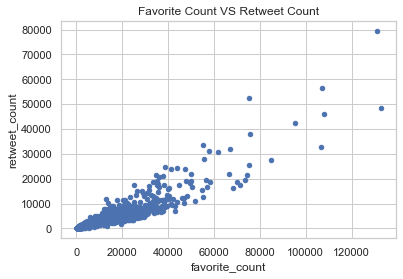

In [669]:
# 1. Favorite count VS retweet count
df_final.plot(kind='scatter', x='favorite_count', y='retweet_count').set_title('Favorite Count VS Retweet Count')

In [670]:
df_final.dog_stage.value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

In [671]:
df_final.groupby('dog_stage')['favorite_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,75.0,17369.093333,20970.142975,758.0,6461.50,11519.0,18421.00,131075.0
"doggo, floofer",1.0,17169.000000,NaN,17169.0,17169.00,17169.0,17169.00,17169.0
"doggo, pupper",10.0,12077.100000,11607.476627,4849.0,7272.50,8863.5,10181.75,44619.0
"doggo, puppo",1.0,47844.000000,NaN,47844.0,47844.00,47844.0,47844.00,47844.0
floofer,9.0,11064.444444,10680.460853,1618.0,4015.00,6076.0,12456.00,33345.0
pupper,224.0,7176.267857,10508.746096,269.0,2428.25,3325.5,7582.50,106827.0
puppo,24.0,20788.875000,27097.969414,1614.0,6746.75,13387.5,20450.50,132810.0


Text(0, 0.5, 'Favorite Count')

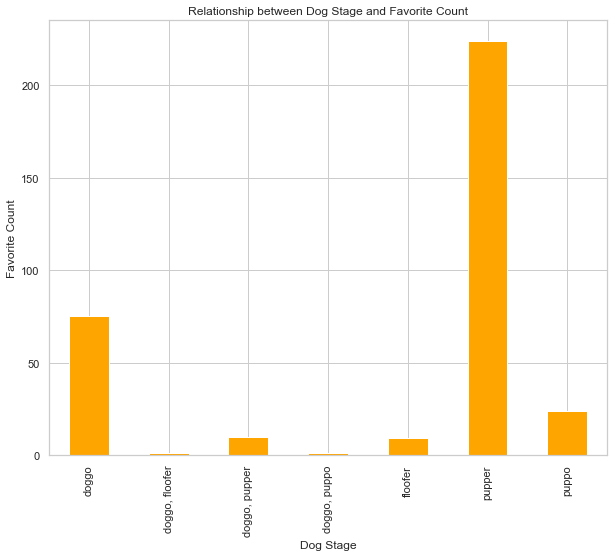

In [672]:
plt.figure(figsize=(10,8))
sns.set(style="whitegrid")
df_final.groupby("dog_stage")['favorite_count'].count().plot(kind='bar', color='orange');
plt.title('Relationship between Dog Stage and Favorite Count')
plt.xlabel('Dog Stage')
plt.ylabel('Favorite Count')

In [673]:
df_final.groupby('dog_stage')['retweet_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,75.0,6348.786667,11939.932686,39.0,1948.50,2882.0,5145.00,79515.0
"doggo, floofer",1.0,3433.000000,NaN,3433.0,3433.00,3433.0,3433.00,3433.0
"doggo, pupper",10.0,3971.200000,4843.038459,1265.0,2237.00,2543.0,3053.25,17621.0
"doggo, puppo",1.0,19196.000000,NaN,19196.0,19196.00,19196.0,19196.00,19196.0
floofer,9.0,4155.888889,5590.254566,496.0,1141.00,2509.0,3825.00,18497.0
pupper,224.0,2457.723214,3763.952306,26.0,687.50,1246.5,2478.50,32883.0
puppo,24.0,6332.500000,9948.301734,179.0,1648.75,3130.0,7044.25,48265.0


Text(0, 0.5, 'Retweet Count')

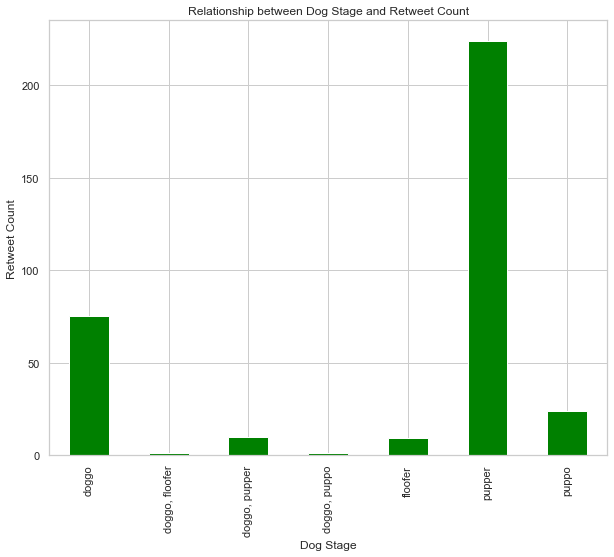

In [674]:
plt.figure(figsize=(10,8))
sns.set(style="whitegrid")
df_final.groupby("dog_stage")['retweet_count'].count().plot(kind='bar', color='Green');
plt.title('Relationship between Dog Stage and Retweet Count')
plt.xlabel('Dog Stage')
plt.ylabel('Retweet Count')

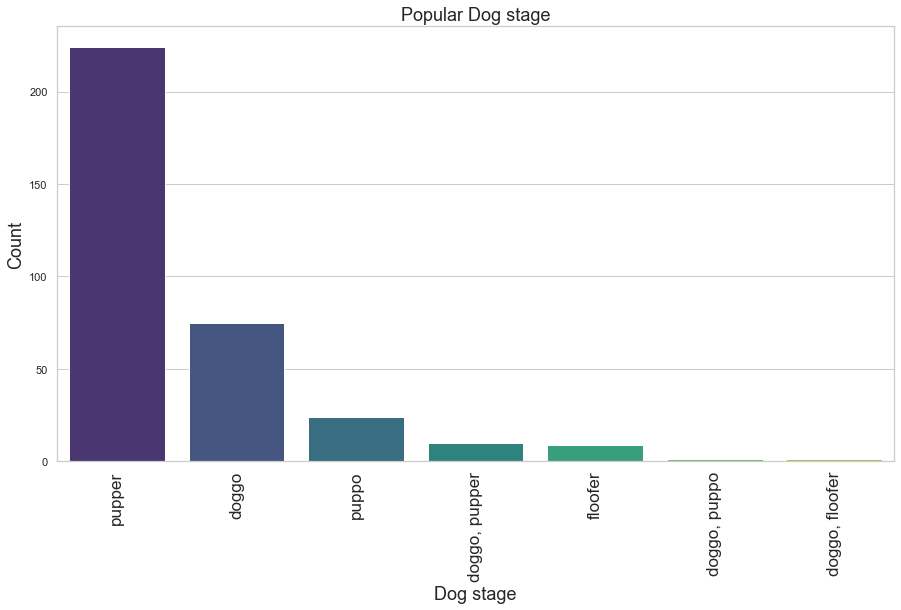

In [675]:
# High popular dog stage count tweets
plt.figure(figsize = (15,8))
ax = sns.barplot(x = df_final['dog_stage'].value_counts()[0:10].index,
            y =df_final['dog_stage'].value_counts()[0:10],
            data = df_final, palette='viridis' );
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 17);
plt.xlabel("Dog stage",fontsize = 18);
plt.ylabel("Count",fontsize = 18);
plt.title("Popular Dog stage",fontsize = 18);

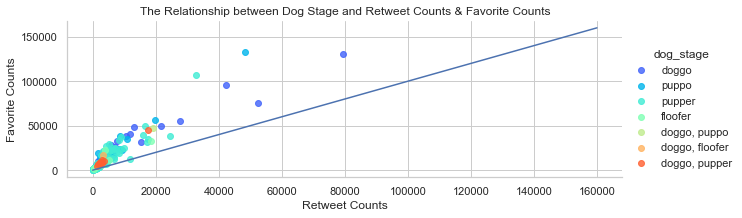

In [676]:
#What is the relationship between dog stages and retweet counts and favorite counts ?
g = sns.FacetGrid(data = df_final , hue = 'dog_stage', aspect = 3, palette='rainbow')
g = g.map( sns.regplot, 'retweet_count', 'favorite_count',  x_jitter = 0.08, fit_reg = False);
g.add_legend()
plt.xlabel('Retweet Counts')
plt.ylabel('Favorite Counts')
plt.title('The Relationship between Dog Stage and Retweet Counts & Favorite Counts')
plt.plot([0, 160000], [0, 160000], '-')


# Storing Clean Data

In [677]:
# Store the clean DataFrame in a CSV file
df_final.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')